In [1]:
%pylab inline
import pandas as pd
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
import fastparquet
reload(fastparquet)

<module 'fastparquet' from '/home/spark/anaconda2/lib/python2.7/site-packages/fastparquet/__init__.pyc'>

In [3]:
%time train_test_num=pd.read_csv("../input/train_test_num.csv",index_col=0)

CPU times: user 5min 21s, sys: 24.2 s, total: 5min 45s
Wall time: 5min 45s


In [4]:
train_test_num.head()

customer_id    market  date  f_0       f_1       f_2       f_3  \
id                                                                          
10000000  133900852745  3.397906     0  1.0 -0.000018 -0.000015 -0.000017   
10000001  133900858907  4.450314     0  1.0 -0.000018 -0.000018 -0.000018   
10000002  133900922919  3.532056     0  1.0 -0.000018 -0.000016 -0.000018   
10000003  133901138589  3.380680     0  1.0 -0.000018  0.000005 -0.000018   
10000004  133901138589  4.191529     0  1.0 -0.000018  0.000008 -0.000018   

               f_4       f_5       f_6   ...         f_34      f_35      f_36  \
id                                       ...                                    
10000000 -0.000015 -0.000018 -0.000015   ...    -0.000018 -0.000014 -0.000010   
10000001 -0.000018 -0.000018 -0.000018   ...    -0.000018 -0.000018 -0.000018   
10000002 -0.000016 -0.000018 -0.000007   ...    -0.000018 -0.000018 -0.000018   
10000003  0.000005 -0.000018  0.000008   ...    -0.000018  0.000003  0.000030   
10000004  0.000008 -0.000018  0.000018   ...    -0.000018 -0.000018 -0.000018   

              f_37      f_38      f_39      f_40      f_41  target  istrain  
id                                                                           
10000000  0.000006  0.000034 -0.000018  3.954393  4.759003       1        1  
10000001 -0.000013 -0.000012 -0.000018  3.903278  3.821491       1        1  
10000002 -0.000016 -0.000016 -0.000018  3.954393  4.795864       1        1  
10000003  0.000068  0.000083 -0.000018  3.954393  3.480309       4        1  
10000004 -0.000015 -0.000015 -0.000018  3.954393  3.480309       5        1  

[5 rows x 47 columns]

In [8]:
train_test_num.shape

(28140728, 47)

In [7]:
len(set(train_test_num.index))

28140728

In [10]:
len(set(train_test_num.customer_id))

2741181

In [6]:
set(train_test_num.date)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13}

In [9]:
train_test_num[['customer_id','market','date']].groupby(['customer_id','market']).count().shape

(3238187, 1)

In [12]:
train_test_num['customer_market']=train_test_num[['customer_id','market']].apply(lambda u: "_".join(u.values.astype(np.str)),axis=1)

In [13]:
len(set(train_test_num['customer_market']))

3238187

In [14]:
customer_market_map= {v:i for i,v in enumerate(set(train_test_num['customer_market']))}

In [15]:
customer_market_map.items()[:3]

[('2.04114465357e+11_3.53205633163', 0),
 ('2.57430384494e+11_4.63605499268', 1),
 ('1.67719338745e+11_3.98962926865', 2)]

In [17]:
train_test_num['rid']=train_test_num['customer_market'].map(lambda u: customer_market_map[u])

In [18]:
train_test_num.head()

customer_id    market  date  f_0       f_1       f_2       f_3  \
id                                                                          
10000000  133900852745  3.397906     0  1.0 -0.000018 -0.000015 -0.000017   
10000001  133900858907  4.450314     0  1.0 -0.000018 -0.000018 -0.000018   
10000002  133900922919  3.532056     0  1.0 -0.000018 -0.000016 -0.000018   
10000003  133901138589  3.380680     0  1.0 -0.000018  0.000005 -0.000018   
10000004  133901138589  4.191529     0  1.0 -0.000018  0.000008 -0.000018   

               f_4       f_5       f_6   ...         f_36      f_37      f_38  \
id                                       ...                                    
10000000 -0.000015 -0.000018 -0.000015   ...    -0.000010  0.000006  0.000034   
10000001 -0.000018 -0.000018 -0.000018   ...    -0.000018 -0.000013 -0.000012   
10000002 -0.000016 -0.000018 -0.000007   ...    -0.000018 -0.000016 -0.000016   
10000003  0.000005 -0.000018  0.000008   ...     0.000030  0.000068  0.000083   
10000004  0.000008 -0.000018  0.000018   ...    -0.000018 -0.000015 -0.000015   

              f_39      f_40      f_41  target  istrain  \
id                                                        
10000000 -0.000018  3.954393  4.759003       1        1   
10000001 -0.000018  3.903278  3.821491       1        1   
10000002 -0.000018  3.954393  4.795864       1        1   
10000003 -0.000018  3.954393  3.480309       4        1   
10000004 -0.000018  3.954393  3.480309       5        1   

                          customer_market      rid  
id                                                  
10000000  1.33900852745e+11_3.39790630341  2662807  
10000001  1.33900858907e+11_4.45031404495  1665094  
10000002  1.33900922919e+11_3.53205633163   801248  
10000003  1.33901138589e+11_3.38068008423  3138958  
10000004  1.33901138589e+11_4.19152927399   154109  

[5 rows x 49 columns]

In [21]:
new_train_test_num=train_test_num.drop(['customer_id','customer_market','istrain'],axis=1)

In [22]:
new_train_test_num.head()

market  date  f_0       f_1       f_2       f_3       f_4  \
id                                                                      
10000000  3.397906     0  1.0 -0.000018 -0.000015 -0.000017 -0.000015   
10000001  4.450314     0  1.0 -0.000018 -0.000018 -0.000018 -0.000018   
10000002  3.532056     0  1.0 -0.000018 -0.000016 -0.000018 -0.000016   
10000003  3.380680     0  1.0 -0.000018  0.000005 -0.000018  0.000005   
10000004  4.191529     0  1.0 -0.000018  0.000008 -0.000018  0.000008   

               f_5       f_6       f_7   ...         f_34      f_35      f_36  \
id                                       ...                                    
10000000 -0.000018 -0.000015 -0.000021   ...    -0.000018 -0.000014 -0.000010   
10000001 -0.000018 -0.000018 -0.000018   ...    -0.000018 -0.000018 -0.000018   
10000002 -0.000018 -0.000007 -0.000014   ...    -0.000018 -0.000018 -0.000018   
10000003 -0.000018  0.000008 -0.000017   ...    -0.000018  0.000003  0.000030   
10000004 -0.000018  0.000018 -0.000018   ...    -0.000018 -0.000018 -0.000018   

              f_37      f_38      f_39      f_40      f_41  target      rid  
id                                                                           
10000000  0.000006  0.000034 -0.000018  3.954393  4.759003       1  2662807  
10000001 -0.000013 -0.000012 -0.000018  3.903278  3.821491       1  1665094  
10000002 -0.000016 -0.000016 -0.000018  3.954393  4.795864       1   801248  
10000003  0.000068  0.000083 -0.000018  3.954393  3.480309       4  3138958  
10000004 -0.000015 -0.000015 -0.000018  3.954393  3.480309       5   154109  

[5 rows x 46 columns]

In [3]:
#new_train_test_num=pd.read_csv('../input/abc.csv')

In [4]:
new_train_test_num.shape

(28140728, 47)

In [5]:
new_train_test_num['date']=new_train_test_num['date'].astype(np.int8)

In [6]:
new_train_test_num['target']=new_train_test_num['target'].astype(np.int8)

In [7]:
new_train_test_num['market']=new_train_test_num['market'].astype(np.float32)

In [8]:
set(new_train_test_num['target'])

{-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20}

In [9]:
columns=[col for col in new_train_test_num.columns if col.startswith('f')]

In [10]:
i=0
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_0


count    2.814073e+07
mean     9.713137e-01
std      1.425917e-01
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: f_0, dtype: float64

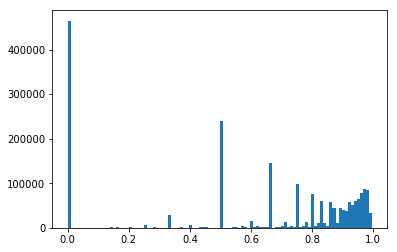

In [11]:
plt.hist(s[(s<1) ],bins=100);plt.show()

In [12]:
new_train_test_num[col]=s.astype(np.float32)

In [13]:
i=1
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_1


count    2.814073e+07
mean    -1.777440e-05
std      7.150962e-08
min     -1.789043e-05
25%     -1.781228e-05
50%     -1.781228e-05
75%     -1.773413e-05
max      4.150372e-05
Name: f_1, dtype: float64

In [14]:
s=np.log((s-s.min())*1e7+1)
s.describe()

count    2.814073e+07
mean     7.326865e-01
std      2.616744e-01
min      0.000000e+00
25%      5.774515e-01
50%      5.774515e-01
75%      9.411796e-01
max      6.388463e+00
Name: f_1, dtype: float64

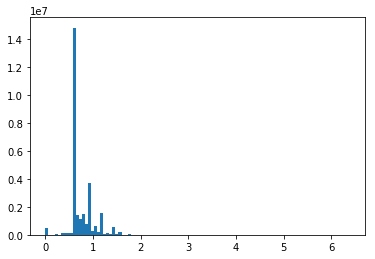

In [15]:
plt.hist(s ,bins=100);plt.show()


In [16]:
new_train_test_num[col]=s.astype(np.float32)

In [17]:
i=2
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_2


count    2.814073e+07
mean     3.150948e-06
std      1.471247e-04
min     -1.789043e-05
25%     -1.538963e-05
50%     -1.077876e-05
75%      8.343575e-07
max      3.682659e-01
Name: f_2, dtype: float64

In [18]:
s=np.log((s-s.min())*1e5+1)
s.describe()

count    2.814073e+07
mean     7.459930e-01
std      7.066703e-01
min      0.000000e+00
25%      2.232081e-01
50%      5.371755e-01
75%      1.055175e+00
max      1.051405e+01
Name: f_2, dtype: float64

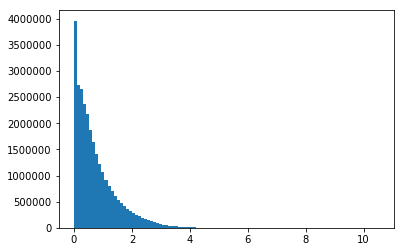

In [19]:
plt.hist(s ,bins=100);plt.show()


In [20]:
new_train_test_num[col]=s.astype(np.float32)

In [21]:
i=3
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_3


count    2.814073e+07
mean    -1.294492e-05
std      1.381537e-04
min     -1.789043e-05
25%     -1.789043e-05
50%     -1.789043e-05
75%     -1.749968e-05
max      3.682659e-01
Name: f_3, dtype: float64

In [22]:
s=(s-s.min())*1e7
s=np.log(s+1)
s.describe()

count    2.814073e+07
mean     1.052315e+00
std      1.889210e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.590764e+00
max      1.511919e+01
Name: f_3, dtype: float64

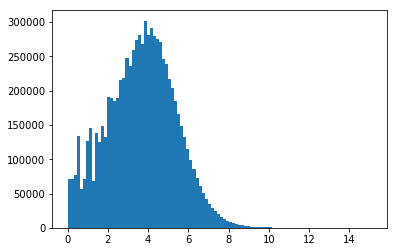

In [23]:
plt.hist(s[s>0] ,bins=100);plt.show()

In [24]:
new_train_test_num[col]=s.astype(np.float32)

In [25]:
i=4
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_4


count    2.814073e+07
mean    -1.910631e-06
std      5.001081e-05
min     -1.789043e-05
25%     -1.695263e-05
50%     -1.316234e-05
75%     -3.725707e-06
max      2.942223e-02
Name: f_4, dtype: float64

In [26]:
s=(s-s.min())*1e5
s=np.log(s+1)
s.describe()

count    2.814073e+07
mean     6.070174e-01
std      6.757479e-01
min      0.000000e+00
25%      8.963975e-02
50%      3.871713e-01
75%      8.823088e-01
max      7.987868e+00
Name: f_4, dtype: float64

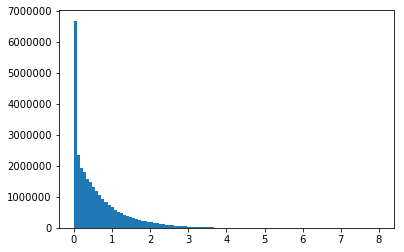

In [27]:
plt.hist(s  ,bins=100);plt.show()

In [28]:
new_train_test_num[col]=s.astype(np.float32)

In [29]:
i=5
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_5


count    2.814073e+07
mean    -1.777437e-05
std      1.209063e-06
min     -1.789043e-05
25%     -1.789043e-05
50%     -1.789043e-05
75%     -1.789043e-05
max      5.212679e-04
Name: f_5, dtype: float64

In [30]:
s=(s-s.min())*1e5
s=np.log(s+1)
s.describe()

count    2.814073e+07
mean     8.888371e-03
std      6.230845e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.005802e+00
Name: f_5, dtype: float64

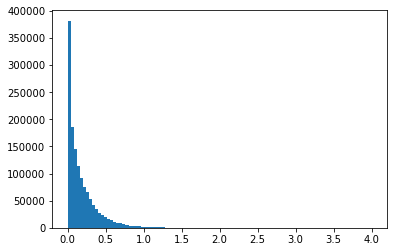

In [31]:
plt.hist(s[s>0]  ,bins=100);plt.show()

In [32]:
new_train_test_num[col]=s.astype(np.float32)

In [33]:
i=6
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_6


count    2.814073e+07
mean     4.356458e-06
std      3.929429e-04
min     -2.261064e-01
25%     -1.624928e-05
50%     -9.450210e-06
75%      6.179832e-06
max      1.000000e+00
Name: f_6, dtype: float64

In [34]:
s=(s-s.min())*1e5
s=np.log(s+1)
s.describe()

count    2.814073e+07
mean     1.002624e+01
std      2.367255e-03
min      0.000000e+00
25%      1.002615e+01
50%      1.002618e+01
75%      1.002625e+01
max      1.171678e+01
Name: f_6, dtype: float64

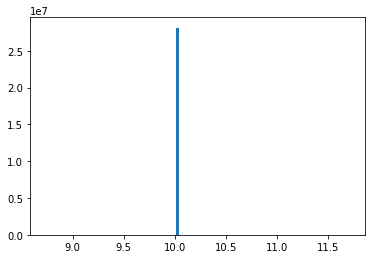

In [35]:
plt.hist(s[s>0]  ,bins=100);plt.show()

In [36]:
new_train_test_num[col]=s.astype(np.float32)

In [37]:
i=7
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_7


count    2.814073e+07
mean    -1.322861e-05
std      3.856254e-04
min     -2.261064e-01
25%     -1.789043e-05
50%     -1.789043e-05
75%     -1.789043e-05
max      1.000000e+00
Name: f_7, dtype: float64

In [38]:
s=(s-s.min())*1e5
s=np.log(s+1)
s.describe()

count    2.814073e+07
mean     1.002616e+01
std      2.344664e-03
min      0.000000e+00
25%      1.002614e+01
50%      1.002614e+01
75%      1.002614e+01
max      1.171678e+01
Name: f_7, dtype: float64

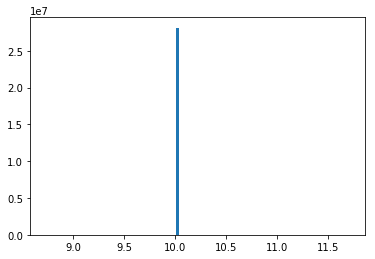

In [39]:
plt.hist(s[s>0]  ,bins=100);plt.show()

In [40]:
new_train_test_num[col]=s.astype(np.float32)

In [41]:
i=8
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_8


count    2.814073e+07
mean    -3.310470e-07
std      7.554026e-05
min     -2.184517e-02
25%     -1.734338e-05
50%     -1.206824e-05
75%      1.101656e-07
max      4.604439e-02
Name: f_8, dtype: float64

In [42]:
s=(s-s.min())*1e5
s=np.log(s+1)
s.describe()

count    2.814073e+07
mean     7.689587e+00
std      3.616444e-03
min      0.000000e+00
25%      7.688814e+00
50%      7.689055e+00
75%      7.689613e+00
max      8.823200e+00
Name: f_8, dtype: float64

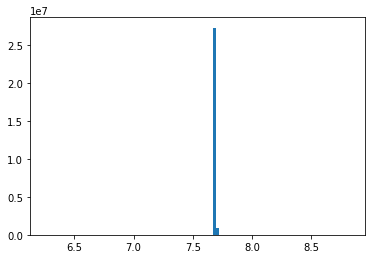

In [43]:
plt.hist(s[s>0]  ,bins=100);plt.show()

In [44]:
new_train_test_num[col]=s.astype(np.float32)

In [45]:
i=9
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_9


count    2.814073e+07
mean    -1.786475e-05
std      1.745190e-06
min     -9.197438e-04
25%     -1.789043e-05
50%     -1.789043e-05
75%     -1.789043e-05
max      1.294304e-03
Name: f_9, dtype: float64

In [46]:
s=(s-s.min())*1e5
s=np.log(s+1)
s.describe()

count    2.814073e+07
mean     4.512920e+00
std      2.827737e-03
min      0.000000e+00
25%      4.512894e+00
50%      4.512894e+00
75%      4.512894e+00
max      5.404499e+00
Name: f_9, dtype: float64

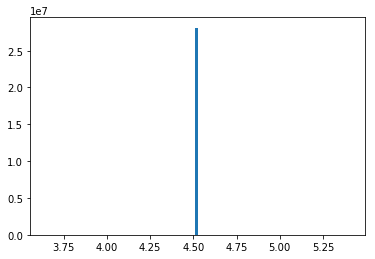

In [47]:
plt.hist(s[s>0]  ,bins=100);plt.show()

In [48]:
new_train_test_num[col]=s.astype(np.float32)

In [49]:
i=10
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_10


count    2.814073e+07
mean    -4.073303e-06
std      2.709531e-04
min     -1.789043e-05
25%     -1.789043e-05
50%     -1.706985e-05
75%     -7.396679e-06
max      4.048002e-01
Name: f_10, dtype: float64

In [50]:
s=(s-s.min())*1e5
s=np.log(s+1)
s.describe()

count    2.814073e+07
mean     4.564522e-01
std      6.963000e-01
min      0.000000e+00
25%      0.000000e+00
50%      7.886451e-02
75%      7.175350e-01
max      1.060863e+01
Name: f_10, dtype: float64

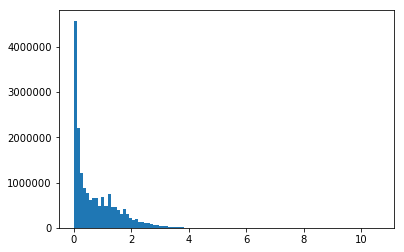

In [51]:
plt.hist(s[s>0]  ,bins=100);plt.show()

In [52]:
new_train_test_num[col]=s.astype(np.float32)

In [53]:
i=11
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_11


count    2.814073e+07
mean    -6.267107e-06
std      3.590798e-05
min     -1.789043e-05
25%     -1.789043e-05
50%     -1.789043e-05
75%     -1.495980e-05
max      4.757713e-03
Name: f_11, dtype: float64

In [54]:
s=(s-s.min())*1e5
s=np.log(s+1)
s.describe()

count    2.814073e+07
mean     3.533186e-01
std      7.134770e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.570140e-01
max      6.170782e+00
Name: f_11, dtype: float64

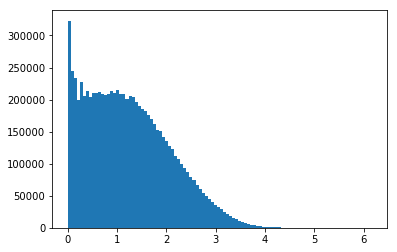

In [55]:
plt.hist(s[s>0]  ,bins=100);plt.show()

In [56]:
new_train_test_num[col]=s.astype(np.float32)

In [57]:
i=12
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_12


count    2.814073e+07
mean     1.453108e-05
std      5.653632e-05
min     -1.789043e-05
25%     -1.343587e-05
50%     -2.729292e-06
75%      1.891832e-05
max      4.250489e-02
Name: f_12, dtype: float64

In [58]:
s=(s-s.min())*1e5
s=np.log(s+1)
s.describe()

count    2.814073e+07
mean     1.039726e+00
std      8.224145e-01
min      0.000000e+00
25%      3.684249e-01
50%      9.227156e-01
75%      1.543485e+00
max      8.355445e+00
Name: f_12, dtype: float64

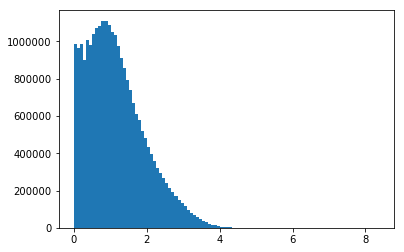

In [59]:
plt.hist(s[s>0]  ,bins=100);plt.show()

In [60]:
new_train_test_num[col]=s.astype(np.float32)

In [61]:
i=13
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_13


count    2.814073e+07
mean    -1.549618e-05
std      1.967573e-05
min     -1.789043e-05
25%     -1.789043e-05
50%     -1.789043e-05
75%     -1.789043e-05
max      5.748685e-03
Name: f_13, dtype: float64

In [62]:
s=(s-s.min())*1e5
s=np.log(s+1)
s.describe()

count    2.814073e+07
mean     6.452503e-02
std      3.484541e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      6.358981e+00
Name: f_13, dtype: float64

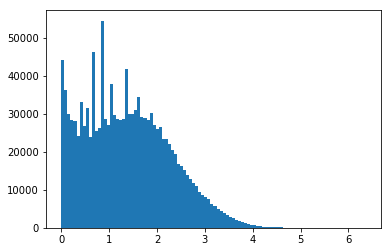

In [63]:
plt.hist(s[s>0]  ,bins=100);plt.show()

In [64]:
new_train_test_num[col]=s.astype(np.float32)

In [65]:
i=14
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_14


count    2.814073e+07
mean    -1.772418e-05
std      2.294881e-07
min     -1.789043e-05
25%     -1.789043e-05
50%     -1.775646e-05
75%     -1.765598e-05
max      1.947563e-04
Name: f_14, dtype: float64

In [66]:
s=(s-s.min())*1e7
s=np.log(s+1)
s.describe()

count    2.814073e+07
mean     7.493153e-01
std      6.541081e-01
min      0.000000e+00
25%      0.000000e+00
50%      8.500244e-01
75%      1.207316e+00
max      7.662687e+00
Name: f_14, dtype: float64

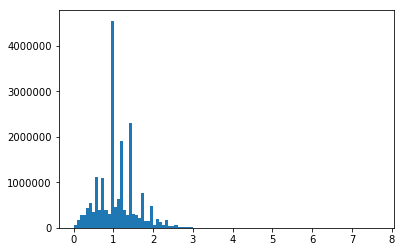

In [67]:
plt.hist(s[s>0]  ,bins=100);plt.show()

In [68]:
new_train_test_num[col]=s.astype(np.float32)

In [69]:
i=15
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_15


count    2.814073e+07
mean    -9.463973e-06
std      2.741585e-05
min     -1.789043e-05
25%     -1.777321e-05
50%     -1.538286e-05
75%     -1.028381e-05
max      1.225326e-02
Name: f_15, dtype: float64

In [70]:
s=(s-s.min())*1e5
s=np.log(s+1)
s.describe()

count    2.814073e+07
mean     3.979128e-01
std      5.133028e-01
min      0.000000e+00
25%      1.165430e-02
50%      2.237488e-01
75%      5.656899e-01
max      7.113235e+00
Name: f_15, dtype: float64

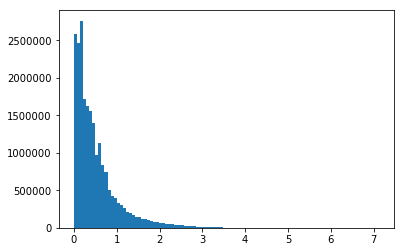

In [71]:
plt.hist(s[s>0]  ,bins=100);plt.show()

In [72]:
new_train_test_num[col]=s.astype(np.float32)

In [73]:
i=16
col=columns[i]
print col
s=new_train_test_num[col]
print set(s)
s.describe()

f_16
set([3.0061333179500003, 6.3438396453900001, 4.83523845673, 4.5413579940800002, 8.673748970030001])


count    2.814073e+07
mean     3.819484e+00
std      1.351530e+00
min      3.006133e+00
25%      3.006133e+00
50%      3.006133e+00
75%      4.541358e+00
max      8.673749e+00
Name: f_16, dtype: float64

In [74]:
new_train_test_num[col]=s.astype(np.float32)

In [75]:
i=17
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_17


count    2.814073e+07
mean     3.799500e+00
std      2.766912e-01
min      1.906824e+00
25%      3.791444e+00
50%      3.791444e+00
75%      3.791444e+00
max      4.286094e+00
Name: f_17, dtype: float64

set([3.7914443016100003, 3.8588047027599996, 2.1609127521500002, 1.90682387352, 4.2860937118500004])


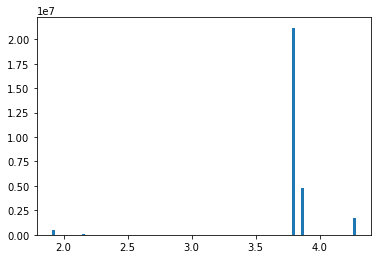

In [76]:
print set(s)
plt.hist(s[s>0]  ,bins=100);plt.show()

In [77]:
new_train_test_num[col]=s.astype(np.float32)

In [78]:
i=18
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_18


count    2.814073e+07
mean     3.798839e+00
std      1.001152e-01
min      3.749842e+00
25%      3.749842e+00
50%      3.749842e+00
75%      3.749842e+00
max      4.055550e+00
Name: f_18, dtype: float64

set([3.9804258346599997, 4.0555496215800009, 3.7498416900599998])


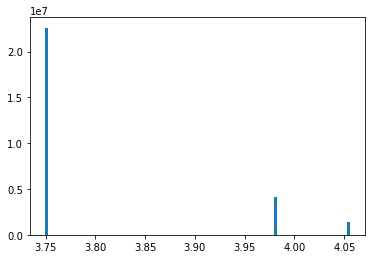

In [79]:
print set(s)
plt.hist(s[s>0]  ,bins=100);plt.show()

In [80]:
new_train_test_num[col]=s.astype(np.float32)

In [81]:
i=19
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_19


count    2.814073e+07
mean     3.806532e+00
std      4.799078e-01
min      3.316692e+00
25%      3.316692e+00
50%      3.973852e+00
75%      3.973852e+00
max      4.735777e+00
Name: f_19, dtype: float64

set([3.3166916370399999, 4.7357769012500004, 3.9089250564599998, 3.9738521575900001])


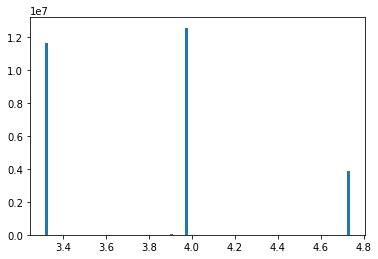

In [82]:
print set(s)
plt.hist(s[s>0]  ,bins=100);plt.show()

In [83]:
new_train_test_num[col]=s.astype(np.float32)

In [84]:
i=20
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_20


count    2.814073e+07
mean    -1.356386e-05
std      1.207063e-06
min     -2.429875e-05
25%     -1.437367e-05
50%     -1.343587e-05
75%     -1.265437e-05
max     -8.746858e-06
Name: f_20, dtype: float64

In [85]:
s=(s-s.min())*1e6
s=np.log(s+1)
s.describe()

count    2.814073e+07
mean     2.457120e+00
std      1.052202e-01
min      0.000000e+00
25%      2.391061e+00
50%      2.473414e+00
75%      2.537213e+00
max      2.806500e+00
Name: f_20, dtype: float64

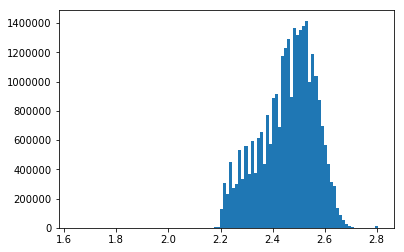

In [86]:
plt.hist(s[s>0]  ,bins=100);plt.show()

In [87]:
new_train_test_num[col]=s.astype(np.float32)

In [88]:
i=21
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_21


count    2.814073e+07
mean     3.799336e+00
std      7.776193e-02
min      3.515576e+00
25%      3.779899e+00
50%      3.798777e+00
75%      3.798777e+00
max      4.412198e+00
Name: f_21, dtype: float64

4


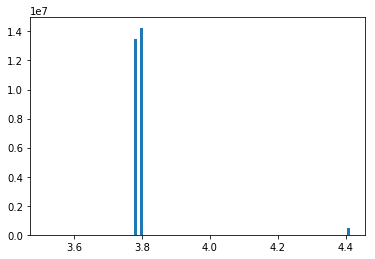

In [89]:
print len(set(s))
plt.hist(s[s>0]  ,bins=100);plt.show()

In [90]:
new_train_test_num[col]=s.astype(np.float32)

In [91]:
i=22
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_22


count    2.814073e+07
mean     3.798731e+00
std      3.323921e-01
min      3.471199e+00
25%      3.501269e+00
50%      3.690526e+00
75%      4.271889e+00
max      4.271889e+00
Name: f_22, dtype: float64

5


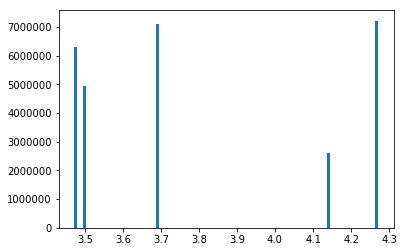

In [92]:
print len(set(s))
plt.hist(s[s>0]  ,bins=100);plt.show()

In [93]:
new_train_test_num[col]=s.astype(np.float32)

In [94]:
i=23
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_23


count    2.814073e+07
mean     3.798731e+00
std      3.323921e-01
min      3.471199e+00
25%      3.501269e+00
50%      3.690526e+00
75%      4.271889e+00
max      4.271889e+00
Name: f_23, dtype: float64

5


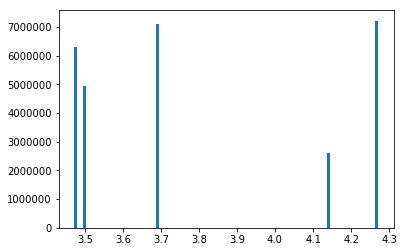

In [95]:
print len(set(s))
plt.hist(s[s>0]  ,bins=100);plt.show()

In [96]:
new_train_test_num[col]=s.astype(np.float32)

In [97]:
i=24
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_24


count    2.814073e+07
mean     3.799741e+00
std      6.060844e-01
min      2.280775e+00
25%      3.480227e+00
50%      3.658249e+00
75%      4.092158e+00
max      6.912667e+00
Name: f_24, dtype: float64

32


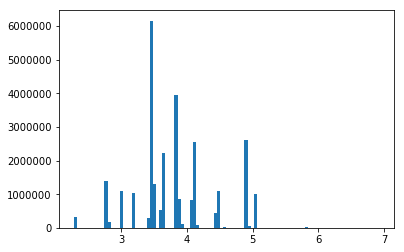

In [98]:
print len(set(s))
plt.hist(s[s>0]  ,bins=100);plt.show()

In [99]:
new_train_test_num[col]=s.astype(np.float32)

In [100]:
i=25
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_25


count    2.814073e+07
mean     3.806261e+00
std      2.298250e-01
min      3.464455e+00
25%      3.464455e+00
50%      3.960792e+00
75%      3.960792e+00
max      3.960792e+00
Name: f_25, dtype: float64

2


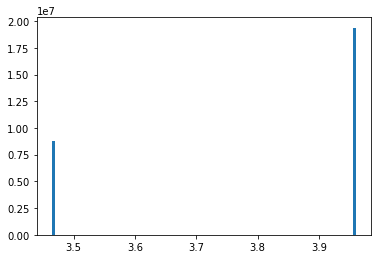

In [101]:
print len(set(s))
plt.hist(s[s>0]  ,bins=100);plt.show()

In [102]:
new_train_test_num[col]=s.astype(np.float32)

In [103]:
i=26
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_26


count    2.814073e+07
mean     3.799425e+00
std      3.678105e-03
min      3.779863e+00
25%      3.800117e+00
50%      3.800117e+00
75%      3.800117e+00
max      3.800117e+00
Name: f_26, dtype: float64

2


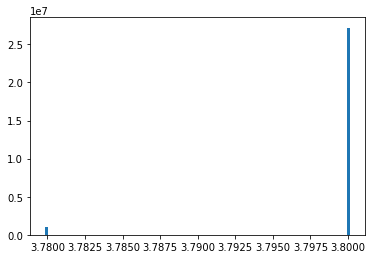

In [104]:
print len(set(s))
plt.hist(s[s>0]  ,bins=100);plt.show()

In [105]:
new_train_test_num[col]=s.astype(np.float32)

In [106]:
i=27
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_27


count    2.814073e+07
mean    -5.042692e-06
std      1.745779e-04
min     -1.789043e-05
25%     -1.512392e-05
50%     -1.171657e-05
75%     -4.683047e-06
max      3.082691e-01
Name: f_27, dtype: float64

In [107]:
s=(s-s.min())*1e6
s=np.log(s+1)
s.describe()

count    2.814073e+07
mean     2.023599e+00
std      1.003444e+00
min      0.000000e+00
25%      1.326151e+00
50%      1.970445e+00
75%      2.653762e+00
max      1.263879e+01
Name: f_27, dtype: float64

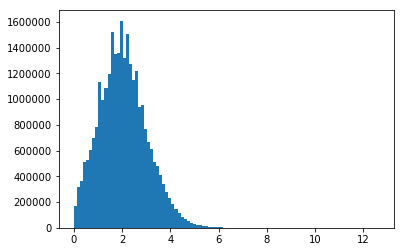

In [108]:
plt.hist(s[s>0]  ,bins=100);plt.show()

In [109]:
new_train_test_num[col]=s.astype(np.float32)

In [110]:
i=28
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_28


count    2.814073e+07
mean     3.811126e+00
std      1.939138e+00
min      1.751010e+00
25%      2.246201e+00
50%      3.493387e+00
75%      4.959929e+00
max      1.162245e+01
Name: f_28, dtype: float64

16


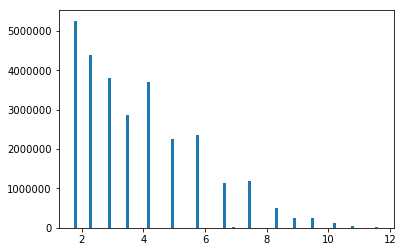

In [111]:
print len(set(s))
plt.hist(s[s>0]  ,bins=100);plt.show()

In [112]:
new_train_test_num[col]=s.astype(np.float32)

In [113]:
i=29
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_29


count    2.814073e+07
mean    -1.337232e-05
std      5.204358e-05
min     -1.789043e-05
25%     -1.789043e-05
50%     -1.789043e-05
75%     -1.395857e-05
max      1.357964e-01
Name: f_29, dtype: float64

In [114]:
s=(s-s.min())*1e6
s=np.log(s+1)
s.describe()

count    2.814073e+07
mean     8.066489e-01
std      1.118563e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.595718e+00
max      1.181905e+01
Name: f_29, dtype: float64

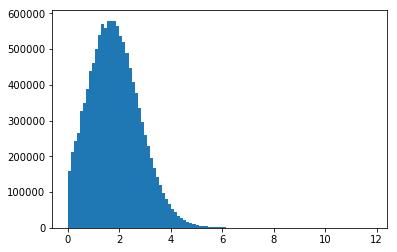

In [115]:
plt.hist(s[s>0]  ,bins=100);plt.show()

In [116]:
new_train_test_num[col]=s.astype(np.float32)

In [117]:
i=30
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_30


count    2.814073e+07
mean    -1.053390e-05
std      5.763709e-05
min     -1.789043e-05
25%     -1.789043e-05
50%     -1.617582e-05
75%     -1.033591e-05
max      1.318383e-01
Name: f_30, dtype: float64

In [118]:
s=(s-s.min())*1e6
s=np.log(s+1)
s.describe()

count    2.814073e+07
mean     1.190915e+00
std      1.246481e+00
min      0.000000e+00
25%      0.000000e+00
50%      9.986504e-01
75%      2.146460e+00
max      1.178947e+01
Name: f_30, dtype: float64

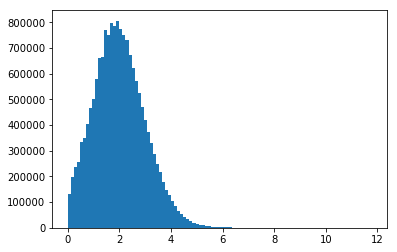

In [119]:
plt.hist(s[s>0]  ,bins=100);plt.show()

In [120]:
new_train_test_num[col]=s.astype(np.float32)

In [121]:
i=31
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_31


count    2.814073e+07
mean    -8.567234e-06
std      6.723392e-05
min     -1.789043e-05
25%     -1.789043e-05
50%     -1.443893e-05
75%     -8.041604e-06
max      1.318383e-01
Name: f_31, dtype: float64

In [122]:
s=(s-s.min())*1e6
s=np.log(s+1)
s.describe()

count    2.814073e+07
mean     1.462915e+00
std      1.256316e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.493242e+00
75%      2.384057e+00
max      1.178947e+01
Name: f_31, dtype: float64

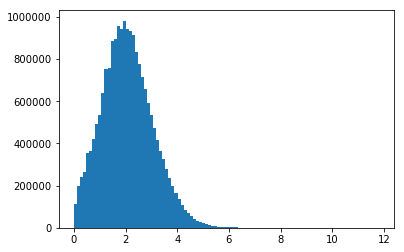

In [123]:
plt.hist(s[s>0]  ,bins=100);plt.show()

In [124]:
new_train_test_num[col]=s.astype(np.float32)

In [125]:
i=32
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_32


count    2.814073e+07
mean    -6.224787e-06
std      1.104279e-04
min     -1.789043e-05
25%     -1.598357e-05
50%     -1.243946e-05
75%     -5.516649e-06
max      2.165488e-01
Name: f_32, dtype: float64

In [126]:
s=(s-s.min())*1e6
s=np.log(s+1)
s.describe()

count    2.814073e+07
mean     1.831669e+00
std      1.141453e+00
min      0.000000e+00
25%      1.067075e+00
50%      1.864232e+00
75%      2.593296e+00
max      1.228566e+01
Name: f_32, dtype: float64

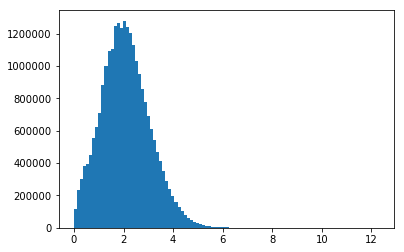

In [127]:
plt.hist(s[s>0]  ,bins=100);plt.show()

In [128]:
new_train_test_num[col]=s.astype(np.float32)

In [129]:
i=33
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_33


count    2.814073e+07
mean     3.809230e+00
std      2.657298e-01
min      3.029397e+00
25%      3.560995e+00
50%      3.814594e+00
75%      3.961022e+00
max      4.237542e+00
Name: f_33, dtype: float64

14


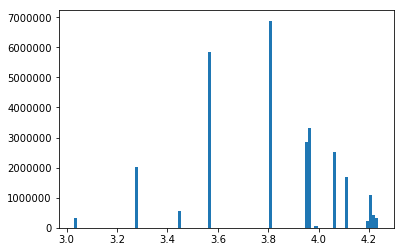

In [130]:
print len(set(s))
plt.hist(s[s>0]  ,bins=100);plt.show()

In [131]:
new_train_test_num[col]=s.astype(np.float32)

In [132]:
i=34
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_34


count    2.814073e+07
mean    -1.784635e-05
std      2.375167e-06
min     -1.789043e-05
25%     -1.789043e-05
50%     -1.789043e-05
75%     -1.789043e-05
max      9.462251e-03
Name: f_34, dtype: float64

In [133]:
s=(s-s.min())*1e6
s=np.log(s+1)
s.describe()

count    2.814073e+07
mean     1.339029e-02
std      1.463943e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.157060e+00
Name: f_34, dtype: float64

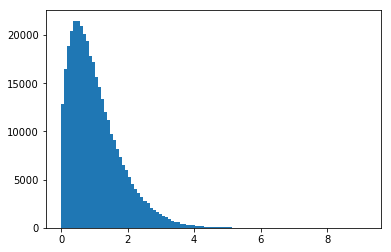

In [134]:
plt.hist(s[s>0]  ,bins=100);plt.show()

In [135]:
new_train_test_num[col]=s.astype(np.float32)

In [136]:
i=35
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_35


count    2.814073e+07
mean    -4.671394e-06
std      8.632172e-05
min     -1.789043e-05
25%     -1.789043e-05
50%     -1.789043e-05
75%     -1.138443e-05
max      9.757839e-02
Name: f_35, dtype: float64

In [137]:
s=(s-s.min())*1e6
s=np.log(s+1)
s.describe()

count    2.814073e+07
mean     1.045679e+00
std      1.485605e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.015703e+00
max      1.148860e+01
Name: f_35, dtype: float64

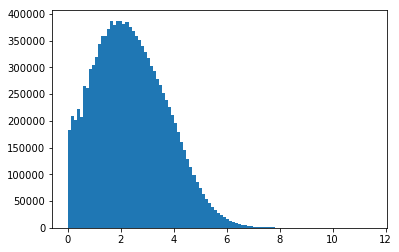

In [138]:
plt.hist(s[s>0]  ,bins=100);plt.show()

In [139]:
new_train_test_num[col]=s.astype(np.float32)

In [140]:
i=36
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_36


count    2.814073e+07
mean     2.098484e-05
std      2.233150e-04
min     -1.789043e-05
25%     -1.789043e-05
50%     -1.538963e-05
75%      3.835326e-06
max      1.365933e-01
Name: f_36, dtype: float64

In [141]:
s=(s-s.min())*1e6
s=np.log(s+1)
s.describe()

count    2.814073e+07
mean     1.714723e+00
std      1.853942e+00
min      0.000000e+00
25%      0.000000e+00
50%      1.252993e+00
75%      3.123499e+00
max      1.182490e+01
Name: f_36, dtype: float64

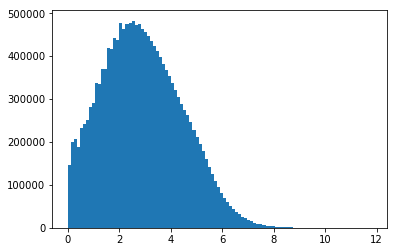

In [142]:
plt.hist(s[s>0]  ,bins=100);plt.show()

In [143]:
new_train_test_num[col]=s.astype(np.float32)

In [144]:
i=37
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_37


count    2.814073e+07
mean     5.813466e-05
std      4.167578e-04
min     -1.789043e-05
25%     -1.789043e-05
50%     -1.007541e-05
75%      2.556108e-05
max      2.571238e-01
Name: f_37, dtype: float64

In [145]:
s=(s-s.min())*1e6
s=np.log(s+1)
s.describe()

count    2.814073e+07
mean     2.264389e+00
std      2.025802e+00
min      0.000000e+00
25%      0.000000e+00
50%      2.176457e+00
75%      3.794399e+00
max      1.245739e+01
Name: f_37, dtype: float64

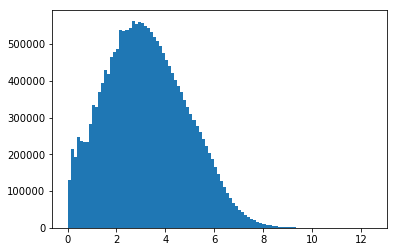

In [146]:
plt.hist(s[s>0]  ,bins=100);plt.show()

In [147]:
new_train_test_num[col]=s.astype(np.float32)

In [148]:
i=38
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_38


count    2.814073e+07
mean     1.337768e-04
std      7.899174e-04
min     -1.789043e-05
25%     -1.429552e-05
50%      2.975673e-06
75%      7.274644e-05
max      5.058143e-01
Name: f_38, dtype: float64

In [149]:
s=(s-s.min())*1e6
s=np.log(s+1)
s.describe()

count    2.814073e+07
mean     3.071326e+00
std      2.029753e+00
min      0.000000e+00
25%      1.524949e+00
50%      3.084938e+00
75%      4.517834e+00
max      1.313396e+01
Name: f_38, dtype: float64

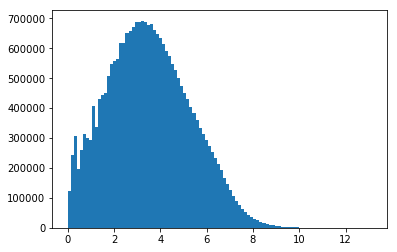

In [150]:
plt.hist(s[s>0]  ,bins=100);plt.show()

In [151]:
new_train_test_num[col]=s.astype(np.float32)

In [152]:
i=39
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_39


count    2.814073e+07
mean    -1.776966e-05
std      6.105085e-06
min     -1.789043e-05
25%     -1.789043e-05
50%     -1.789043e-05
75%     -1.789043e-05
max      2.183557e-02
Name: f_39, dtype: float64

In [153]:
s=(s-s.min())*1e6
s=np.log(s+1)
s.describe()

count    2.814073e+07
mean     2.013708e-02
std      2.137795e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      9.992160e+00
Name: f_39, dtype: float64

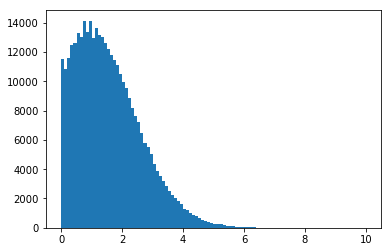

In [154]:
plt.hist(s[s>0]  ,bins=100);plt.show()

In [155]:
new_train_test_num[col]=s.astype(np.float32)

In [156]:
i=41
col=columns[i]
print col
s=new_train_test_num[col]
s.describe()

f_41


count    2.814073e+07
mean     3.799933e+00
std      6.071305e-01
min      2.323828e+00
25%      3.408488e+00
50%      3.753631e+00
75%      4.245948e+00
max      5.722508e+00
Name: f_41, dtype: float64

538


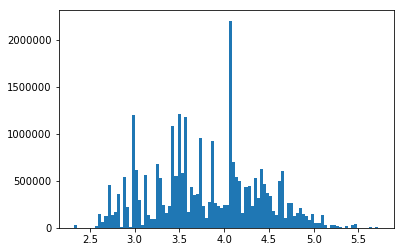

In [157]:
print len(set(s))
plt.hist(s[s>0]  ,bins=100);plt.show()

In [158]:
new_train_test_num[col]=s.astype(np.float32)

In [159]:
new_train_test_num.head()

id    market  date  f_0       f_1       f_2       f_3       f_4  f_5  \
0  10000000  3.397906     0  1.0  0.577451  0.274983  2.099705  0.219032  0.0   
1  10000001  4.450314     0  1.0  0.577451  0.018071  0.000000  0.018071  0.0   
2  10000002  3.532056     0  1.0  0.577451  0.165299  0.577451  0.158652  0.0   
3  10000003  3.380680     0  1.0  0.906711  1.187125  1.498136  1.176471  0.0   
4  10000004  4.191529     0  1.0  1.207316  1.279429  0.000000  1.279429  0.0   

         f_6   ...     f_34      f_35      f_36      f_37      f_38  f_39  \
0  10.026155   ...      0.0  1.496193  2.141881  3.213859  3.961576   0.0   
1  10.026142   ...      0.0  0.000000  0.000000  1.765640  1.948416   0.0   
2  10.026191   ...      0.0  0.000000  0.000000  1.159458  1.159458   0.0   
3  10.026256   ...      0.0  3.092849  3.889546  4.468001  4.623827   0.0   
4  10.026299   ...      0.0  0.000000  0.000000  1.338523  1.338523   0.0   

       f_40      f_41  target      rid  
0  3.954393  4.759003       1  2662807  
1  3.903278  3.821491       1  1665094  
2  3.954393  4.795864       1   801248  
3  3.954393  3.480309       4  3138958  
4  3.954393  3.480309       5   154109  

[5 rows x 47 columns]

In [161]:
%time fastparquet.write('../input/train_test_num_net_step1.parq', new_train_test_num, compression='SNAPPY')

CPU times: user 28.6 s, sys: 7.98 s, total: 36.6 s
Wall time: 37 s


In [162]:
%time new_train_test_num.to_csv("../input/train_test_num_net_step1.csv")

CPU times: user 13min 50s, sys: 16.9 s, total: 14min 6s
Wall time: 14min 20s
